In [2]:
!pip3 install keras

Keras used Tensorflow as backend. Also using keras means less amount of code to write.

In [1]:
from keras.utils import np_utils
from keras.datasets import mnist
import seaborn as sns
from keras.initializers import RandomNormal

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time

In [3]:
# this function is used to update the plots of each epoch and error
def plt_dynamic(x,vy,ty,ax,xolrs=['b']):
    ax.plot(x,vy,'b',label="Validation Loss")
    ax.plot(x,ty,'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [4]:
# loading mnist dataset from keras
(X_train, y_train), (X_test, y_test)= mnist.load_data()

In [5]:
print ("Number of training examples :", X_train.shape[0], "and each image is of shape", X_train[0].shape)
print ("Number of test examples :", X_test.shape[0], "and each image is of shape", X_test[0].shape)

Number of training examples : 60000 and each image is of shape (28, 28)
Number of test examples : 10000 and each image is of shape (28, 28)


In [10]:
X_train.shape

(60000, 784)

In [11]:
# shape of image we have (28*28) vector
# we have to convert the input image in one dimensional vector (1*784)

X_train=X_train.reshape(X_train.shape[0], X_train.shape[1])
X_test=X_test.reshape(X_test.shape[0], X_test.shape[1])

In [12]:
print (X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [13]:
# normalising all training and test data
X_train=X_train/255
X_test=X_test/255

In [14]:
# here we have class labels as number i.e., 1,2,3,....
# we have to convert our class labels into one hot encoder vector
# for multilayer perceptron we need a vector as classlabel

print ("Class label of first image", y_train[0])

y_train=np_utils.to_categorical(y_train, 10)
y_test=np_utils.to_categorical(y_test, 10)

print ("After converting the output into a vector:", y_train[0])

Class label of first image 5
After converting the output into a vector: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### Softmax Classifier

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [16]:
# some model parameters

output_dim=10
input_dim=X_train.shape[1]

batch_size=128
nb_epoch=20

In [17]:
# start building a model
model=Sequential()

model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

In [18]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch,verbose=1, validation_data=(X_test, y_test) )

Epoch 1/20
469/469 [==============================] - 4s 7ms/step - loss: 1.2782 - accuracy: 0.6975 - val_loss: 0.8107 - val_accuracy: 0.8383
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.7150 - accuracy: 0.8416 - val_loss: 0.6068 - val_accuracy: 0.8651
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.5865 - accuracy: 0.8592 - val_loss: 0.5251 - val_accuracy: 0.8758
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.5250 - accuracy: 0.8680 - val_loss: 0.4798 - val_accuracy: 0.8824
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.4876 - accuracy: 0.8738 - val_loss: 0.4499 - val_accuracy: 0.8875
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.4619 - accuracy: 0.8796 - val_loss: 0.4292 - val_accuracy: 0.8905
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.4428 - accuracy: 0.8826 - val_loss: 0.4127 - val_accuracy: 0.8930
Epoch 

Test score: 0.3359009623527527
Test accuracy: 0.9092000126838684


<IPython.core.display.Javascript object>


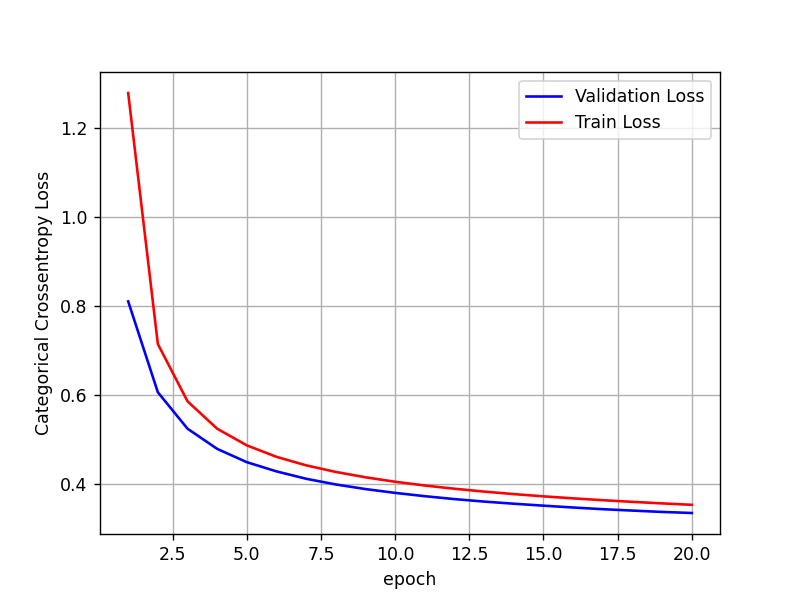

In [21]:
score=model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

fig,ax=plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

# lost of epoch numbers
x=list(range(1,nb_epoch+1))

vy=history.history['val_loss']
ty=history.history['loss']
plt_dynamic(x,vy,ty,ax)

### MLP + Sigmoid activation + SGDoptimizer

In [23]:
# Multilayer perceptron

model_sigmoid=Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 512)               401920    
                                                                 
 dense_2 (Dense)             (None, 128)               65664     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [27]:
model_sigmoid.compile(optimizer='sgd', loss='categorical_crossentropy', metrics='accuracy')

history2=model_sigmoid.fit(X_train,y_train, batch_size=batch_size, epochs=nb_epoch)

Epoch 1/20
469/469 [==============================] - 5s 9ms/step - loss: 0.4675 - accuracy: 0.8757
Epoch 2/20
469/469 [==============================] - 5s 10ms/step - loss: 0.4552 - accuracy: 0.8779
Epoch 3/20
469/469 [==============================] - 4s 9ms/step - loss: 0.4442 - accuracy: 0.8805
Epoch 4/20
469/469 [==============================] - 4s 9ms/step - loss: 0.4342 - accuracy: 0.8833
Epoch 5/20
469/469 [==============================] - 4s 9ms/step - loss: 0.4254 - accuracy: 0.8845
Epoch 6/20
469/469 [==============================] - 6s 13ms/step - loss: 0.4174 - accuracy: 0.8866
Epoch 7/20
469/469 [==============================] - 6s 12ms/step - loss: 0.4099 - accuracy: 0.8883
Epoch 8/20
469/469 [==============================] - 4s 9ms/step - loss: 0.4032 - accuracy: 0.8894
Epoch 9/20
469/469 [==============================] - 4s 9ms/step - loss: 0.3971 - accuracy: 0.8907
Epoch 10/20
469/469 [==============================] - 5s 11ms/step - loss: 0.3914 - accuracy: 0.

Test score: 0.33810728788375854
Test accuracy: 0.9028000235557556


<IPython.core.display.Javascript object>


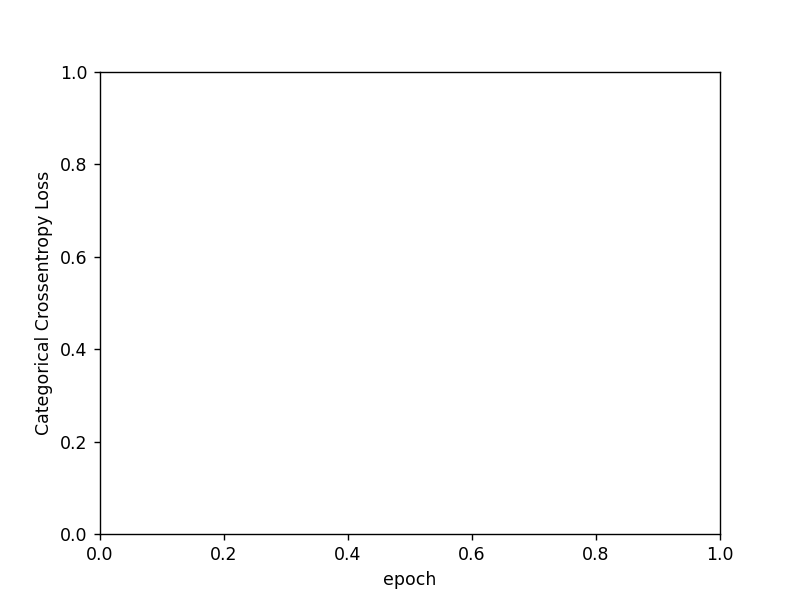

KeyError: 'val_loss'

In [29]:
score=model_sigmoid.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

fig,ax=plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x=list(range(1,nb_epoch+1))

vy=history2.history['val_loss']
ty=history2.history['loss']
plt_dynamic(x,vy,ty,ax)

In [30]:
print(history2.history.keys())

dict_keys(['loss', 'accuracy'])
